In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

Need to remove the unusable and redundant columns

In [2]:
df = pd.read_csv('all_seasons.csv', index_col=0)
df.reset_index(inplace=True, drop = True)
df

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,poss_y,attendance,captain,formation,referee,match report_y,notes,team,season,xg
0,14/09/2020,20:15,Premier League,Matchweek 1,Mon,Away,W,3,1,Brighton,...,48.0,NaN,Jorginho,4-2-2-2,Craig Pawson,Match Report,NaN,Chelsea,2020-2021,NaN
1,20/09/2020,16:30,Premier League,Matchweek 2,Sun,Home,L,0,2,Liverpool,...,39.0,NaN,Jorginho,4/03/2003,Paul Tierney,Match Report,NaN,Chelsea,2020-2021,NaN
2,23/09/2020,19:45,EFL Cup,Third round,Wed,Home,W,6,0,Barnsley,...,69.0,NaN,César Azpilicueta,4-2-3-1,Darren Bond,Match Report,NaN,Chelsea,2020-2021,NaN
3,26/09/2020,17:30,Premier League,Matchweek 3,Sat,Away,D,3,3,West Brom,...,75.0,NaN,Thiago Silva,4-2-3-1,Jonathan Moss,Match Report,NaN,Chelsea,2020-2021,NaN
4,29/09/2020,19:45,EFL Cup,Fourth round,Tue,Away,D,1 (4),1 (5),Tottenham,...,63.0,NaN,César Azpilicueta,4-2-3-1,Lee Mason,Match Report,Tottenham won on penalty kicks following extra...,Chelsea,2020-2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,18/01/2023,20:00,Premiership,Regular season,Wed,Away,W,3,2,Kilmarnock,...,78.0,8461.0,James Tavernier,4-2-3-1,Kevin Clancy,Match Report,NaN,Rangers,2022-2023,NaN
4021,28/01/2023,15:00,Premiership,Regular season,Sat,Home,W,2,0,St Johnstone,...,69.0,49672.0,James Tavernier,4-2-3-1,William Collum,Match Report,NaN,Rangers,2022-2023,NaN
4022,1/02/2023,19:45,Premiership,Regular season,Wed,Away,W,3,0,Hearts,...,51.0,18330.0,James Tavernier,4-2-3-1,John Beaton,Match Report,NaN,Rangers,2022-2023,NaN
4023,4/02/2023,15:00,Premiership,Regular season,Sat,Home,W,2,1,Ross County,...,70.0,49115.0,James Tavernier,4-2-3-1,Euan Anderson,Match Report,NaN,Rangers,2022-2023,NaN


In [3]:
cols_todel = ['ga','match report_x','match report_y','date_opp','time_opp','comp_opp','round_opp','day_opp','venue_opp','result_opp','ga_opp','opponent_opp','xg', 'match report_opp','poss_y', 'comp', 'captain','referee','notes', 'attendance','formation']
df.drop(cols_todel, axis=1, inplace=True)
df.shape

(4025, 215)

gf = gols for
ga = goals against
gf_opp = goals or the opponent
ga_opp = goals against the opponent. 

poss = possession, it has got x, y in the merging, will drop one and use the other. 

Will remove ga and ga_opp as the columns are redundant. 

Some gf and gf_opp parts have "()" in them for aggregate score. I will have to ensure they are processed correctly, I will take the value outside of the parenthesis, as that is the match sore.

In [4]:
df.loc[df["gf"].str.contains(" "),'gf'] = df["gf"].str[0] # if the Score column starts with "(", then grab the first from left char.
df.loc[df["gf_opp"].str.contains(" "),'gf_opp'] = df["gf_opp"].str[0]

df.head(5)

,date,time,round,day,venue,result,gf,opponent,gls,sh,...,pkwon_opp,pkcon_opp,og_opp,recov_opp,won_opp,won%_opp,xg_y,xga,team,season
0,14/09/2020,20:15,Matchweek 1,Mon,Away,W,3,Brighton,3.0,9.0,...,0.0,1.0,0.0,54.0,10.0,43.5,1.2,1.1,Chelsea,2020-2021
1,20/09/2020,16:30,Matchweek 2,Sun,Home,L,0,Liverpool,0.0,4.0,...,0.0,1.0,0.0,53.0,3.0,21.4,0.9,2.1,Chelsea,2020-2021
2,23/09/2020,19:45,Third round,Wed,Home,W,6,Barnsley,6.0,17.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Chelsea,2020-2021
3,26/09/2020,17:30,Matchweek 3,Sat,Away,D,3,West Brom,3.0,22.0,...,0.0,0.0,0.0,48.0,11.0,39.3,2.0,0.6,Chelsea,2020-2021
4,29/09/2020,19:45,Fourth round,Tue,Away,D,1,Tottenham,1.0,7.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Chelsea,2020-2021


## Encoding string columns

- First clean the opponent column before encoding it, the namings are not consistent


In [5]:
len(df['opponent'].unique())

521

In [6]:
df['opponent'] = df['opponent'].apply(lambda x: x[3:].lstrip() if x[0].islower() else x)  # If the format of the name starts with small letters, that is the country code. 

In [7]:
len(df['opponent'].unique())

457

In [8]:
df['opponent'] = df['opponent'].apply(lambda x:'Atletico Madrid' if x == 'Atlético Madrid' else x)
df['opponent'] = df['opponent'].apply(lambda x:'Bayer Leverkusen' if x == 'Leverkusen' else x)


Now encode the rest of the information rich categorical columns.

In [9]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
df["venue_code"] = df["venue"].astype("category").cat.codes
df["opp_code"] = df["opponent"].astype("category").cat.codes #
df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("int")
df["day_code"] = df["date"].dt.dayofweek
df.head()

,date,time,round,day,venue,result,gf,opponent,gls,sh,...,won_opp,won%_opp,xg_y,xga,team,season,venue_code,opp_code,hour,day_code
0,2020-09-14,20:15,Matchweek 1,Mon,Away,W,3,Brighton,3.0,9.0,...,10.0,43.5,1.2,1.1,Chelsea,2020-2021,0,72,20,0
1,2020-09-20,16:30,Matchweek 2,Sun,Home,L,0,Liverpool,0.0,4.0,...,3.0,21.4,0.9,2.1,Chelsea,2020-2021,1,227,16,6
2,2020-09-23,19:45,Third round,Wed,Home,W,6,Barnsley,6.0,17.0,...,NaN,NaN,NaN,NaN,Chelsea,2020-2021,1,49,19,2
3,2020-09-26,17:30,Matchweek 3,Sat,Away,D,3,West Brom,3.0,22.0,...,11.0,39.3,2.0,0.6,Chelsea,2020-2021,0,433,17,5
4,2020-09-29,19:45,Fourth round,Tue,Away,D,1,Tottenham,1.0,7.0,...,NaN,NaN,NaN,NaN,Chelsea,2020-2021,0,393,19,1


## Missing Data
Deleting rows that are missing a lot of stats. Already have very high dimensionality, and not enough data or this many dimensions, so wil remove some of the stat columns. Let us have a visual on the missing values in all the columns. 

(4025, 219)

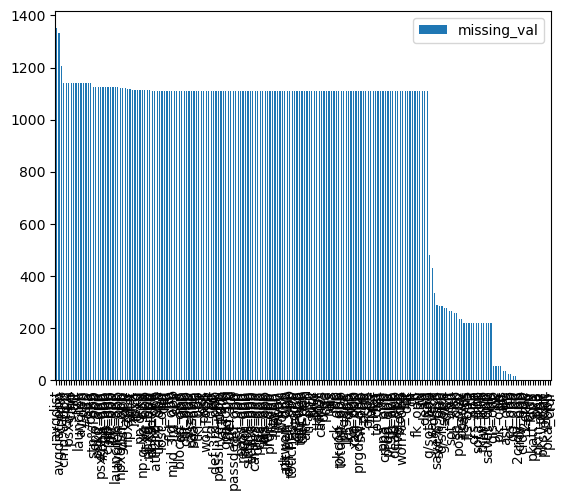

In [10]:
missing = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
missing.rename(columns={0:'missing_val'}, inplace=True)
missing[missing['missing_val']>0].plot.bar()

df.shape

We can see that the number of missing values drops down in a step function. So we delete the columns that have over 300 missing values and the rows for anything less than that. This is the sweet spot as deleting more columns or rows will impact the quality of our data. 
Also, the relationship between various features in football matches is highly (e.g the opponent team) so imputation is not the answer here as it may affect the quality of the data too much.

In [11]:
cols_todel2 = missing[missing['missing_val']>300].index
df.drop(list(cols_todel2), axis=1, inplace=True)
df.shape

(4025, 64)

Of course if one is interested, one can use these columns with the rows that have them, but I choose to have lower dimensionality and more data rows. 

In [12]:
df = df.dropna(axis = 0) #drop rows with missing values
# df = df.reset_index(drop=True)
df.shape # and no missing values.

(3649, 64)

Everything that has to be numeric is already numeric. Let us make a target variable first.

## Setting up the target column

In [13]:
df['result'].value_counts()

W    2090
L     818
D     741
Name: result, dtype: int64

As can be seen from above, the result column is not balanced. Also, according to our brief of predicting if the game is going ot be a win or "not", we will have a binary target column, the result is either a win or loss. Te reason the number of wins is a lot higher than the losses and draws is that these tea have qualified for the Champions League. The qualifying teams win the majority of their games in the domestic leagues as well. 

In [14]:
df = df.sort_values("date")
#df['season'] = df['season'].str[0:4].astype('int')
#del df['index']
df=df.reset_index(drop=True)

In [15]:
df.groupby(["venue"]).apply(lambda x: x[x["result"] == 'W'].shape[0]/ x.shape[0])

venue
Away       0.525999
Home       0.621802
Neutral    0.458333
dtype: float64

In [16]:
df.venue.value_counts() # this is not balanced. Have to drop the venues that are neutral. It is only 24 rows. 

Away       1827
Home       1798
Neutral      24
Name: venue, dtype: int64

In [17]:
df = df.loc[df['venue']!='Neutral'] # dropping venue = neutral. 

In [18]:
df.groupby(["venue"]).apply(lambda x: x[x["result"] == 'W'].shape[0]/ x.shape[0]) # So in %62 of the cases, the team wins their home games, as opposed to onl 52% of their away games. 
# This is our benchmark.

venue
Away    0.525999
Home    0.621802
dtype: float64

In [19]:
df['target'] = (df['result'] == "W").astype("int")

# Prediction Using Machine Learning

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
predictors = ["venue_code", "opp_code", "hour", "day_code"] # initial predictors. 

In [22]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=2, random_state=1, class_weight='balanced')

train = df[df['date']< "2022-04-16"] # Using 70% of the rows for training and 30% for testing. cannot do splits since we cannot use future data to predict past games. 
test = df[df['date']> "2022-04-16"]

rf.fit(train[predictors],train['target'])

predictions = rf.predict(test[predictors])

print(train.shape)
print(test.shape)

accuracy_score(test["target"],predictions)

print('accuracy_score =' ,accuracy_score(test["target"],predictions))

(2503, 65)
(1111, 65)
accuracy_score = 0.5373537353735374


In [23]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=predictions))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,240,225
1,289,357


Accuracy score here is not a good measure, we use precision score as we have false positives and false negatives. 0 is a loss and 1 is a win. 

In [24]:
from sklearn.metrics import precision_score

precision_score(test["target"], predictions, average = None) # this shows that we predict %46 for away games and %62 for home games. We need to improve on this.

array([0.4536862 , 0.61340206])

In [25]:
precision_score(test["target"], predictions, average = 'weighted')

0.5465542890500147

#### Feature engineering
We need to use the rest of the statistics we have to see if we can improve our model. Hence we introduce rolling averages of statistics from previous games as prediction metrics. We have to be careful not to feed any information to the model for predicting a game when we won't have the information. Yu cannot have goals for in the predictors, as that information is known after the game! 

In [26]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(5,closed="left").mean() # closed = left -> to avoid data leakage from future matches
    group[new_cols] = rolling_stats
    group = group.dropna(subset = new_cols)
    return group

In [27]:
def make_predictions(data, predictors):
    rf = RandomForestClassifier(n_estimators=500, min_samples_split=2, random_state=1)

    train = data[data['date']< "2022-03-16"] # Data in order of date use 70% for training
    test = data[data['date']> "2022-03-16"]

    rf.fit(train[predictors],train['target'])

    predictions = rf.predict(test[predictors])

    combined = pd.DataFrame(dict(actual=test["target"], predicted=predictions))

    precision_weight = precision_score(test["target"], predictions, average = 'weighted')
    precision_raw = precision_score(test["target"], predictions, average = None)

    return combined, precision_weight, precision_raw, rf.feature_importances_, rf

### Trying some features based on domain knowledge.

In [28]:
cols = ['gls','gls_opp','gf','gf_opp','sh', 'sot','g/sh','save%_opp','tkl+int','poss_x'] # Choosing based on domain knowledge.
new_cols = [f"{c}_rolling" for c in cols] # add_rolling to column names

df_rolling = df.groupby('team').apply(lambda x: rolling_averages(x,cols,new_cols))
df_rolling = df_rolling.droplevel('team')

combined, precision_weight, precision_raw, importances, rf = make_predictions (df_rolling, predictors+new_cols)

print("The raw precision [Away, Home] is:",precision_raw)
print("The weighted precision is:", precision_weight)

The raw precision [Away, Home] is: [0.57692308 0.63709677]
The weighted precision is: 0.6118544181351725


In [29]:
df_rolling.shape

(3370, 75)

In [30]:
df.groupby(["venue"]).apply(lambda x: x[x["result"] == 'W'].shape[0]/ x.shape[0]) # What we get by predicting home wins, i.e. %62 of the home games are won and %52 of the away games. 

venue
Away    0.525999
Home    0.621802
dtype: float64

We are already over the benchmark with the above stats, but we will try and improve. 

In [31]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,180,315
1,132,553


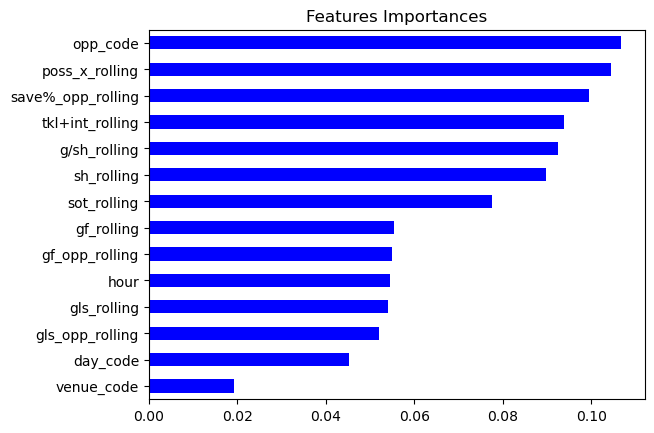

In [32]:
importance = pd.Series(data=importances,
                        index=  predictors+new_cols)
# Sort importances
importances_sorted = importance.sort_values()
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='blue')
plt.title('Features Importances')
plt.show()

### Using all the columns by getting a rolling average for them. 

In [33]:
predictors

['venue_code', 'opp_code', 'hour', 'day_code']

In [34]:
cols = ['gf',
       'gls', 'sh', 'sot', 'sot%', 'g/sh', 'pk', 'pkatt', 'gf_opp', 'gls_opp',
       'sh_opp', 'sot_opp', 'sot%_opp', 'g/sh_opp', 'pk_opp', 'pkatt_opp',
       'sota', 'saves', 'cs', 'pka', 'pksv', 'pkm', 'sota_opp', 'saves_opp',
       'save%_opp', 'cs_opp', 'pka_opp', 'pksv_opp', 'pkm_opp', 'ast',
       'ast_opp', 'crs', 'crs_opp', 'tklw', 'int', 'tkl+int', 'tklw_opp',
       'int_opp', 'tkl+int_opp', 'poss_x', 'poss_opp', 'crdy', 'crdr', '2crdy',
       'fls', 'og', 'crdy_opp', 'crdr_opp', '2crdy_opp', 'fls_opp', 'og_opp',
       ]

rolling_cols = [f"{c}_rolling" for c in cols] # add_rolling to column names

df_rolling = df.groupby('team').apply(lambda x: rolling_averages(x,cols,rolling_cols))
df_rolling = df_rolling.droplevel('team')

all_cols = rolling_cols+predictors

combined, precision_weight, precision_raw, importances, rf = make_predictions (df_rolling, all_cols)

print(precision_raw)
print(precision_weight)

[0.62445415 0.6298633 ]
0.6275942078118223


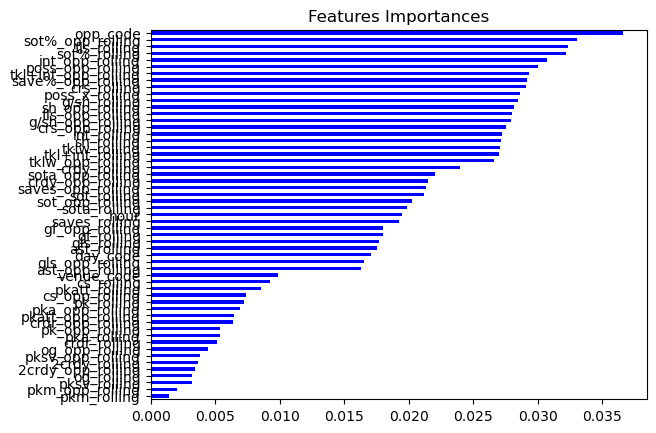

In [35]:
importance = pd.Series(data=importances,
                        index=  all_cols)
# Sort importances
importances_sorted = importance.sort_values()
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='blue')
plt.title('Features Importances')
plt.show()

### We rank the features based on their importance, and then we discard the east important ones. 

In [36]:
data ={'imp_vals':importances}
imp_df = pd.DataFrame(data=data, index=all_cols)
imp_df.sort_values(by = 'imp_vals')

,imp_vals
pkm_rolling,0.001426
pkm_opp_rolling,0.002069
pksv_rolling,0.003182
og_rolling,0.003243
2crdy_opp_rolling,0.003454
2crdy_rolling,0.003691
pksv_opp_rolling,0.003839
og_opp_rolling,0.004438
crdr_rolling,0.005127
pka_rolling,0.005348


In [37]:
predictors3 = imp_df.loc[imp_df['imp_vals']>0.002].index # Selecting from the chosen features, and removing the east important ones. 
combined, precision_weight, precision_raw, importances,rf = make_predictions (df_rolling, predictors3)

print(precision_raw)
print(precision_weight)

pd.crosstab(index=combined["actual"], columns=combined["predicted"])

[0.6199095  0.62669447]
0.6238482355132405


predicted,0,1
actual,,
0,137,358
1,84,601


Hence we have beaten the benchmark using selected features. Using the sequential feature selection to see if we can improve the score did not yield any results that could beat the above. 

## More feature Engineering with summation. 

In [38]:
df_rolling["fls_rolling+sot%_rolling"] = df_rolling["fls_rolling"]+df_rolling['sot%_rolling']

predictors3 = list(predictors3) + ["fls_rolling+sot%_rolling"] 



In [39]:
combined, precision_weight, precision_raw, importances,rf = make_predictions (df_rolling, predictors3)

print(precision_raw)
print(precision_weight)

pd.crosstab(index=combined["actual"], columns=combined["predicted"])

[0.59330144 0.61791967]
0.6075925294742905


predicted,0,1
actual,,
0,124,371
1,85,600


Marginal improvement

In [40]:
import pickle

#### Useful stuff
Do the following to get a list of the numeric columns, or select an type of column based on its tpes. 

```[key for key in dict(DF.dtypes) if dict(DF.dtypes)[key] in ['float64', 'int64']]```

predictors2 = [b for a, b in zip(sfs.get_support(), all_cols) if a] # extracting the features sfs has chosen for us. all_cols is a string list of all the columns, this uses the sfs.get_support mask.

In [42]:
selected_columns = ['team','venue','opponent','venue_code','opp_code','hour','day_code',
 'gf_rolling','gls_rolling','sh_rolling','sot_rolling','sot%_rolling','g/sh_rolling',
 'pk_rolling','pkatt_rolling','gf_opp_rolling','gls_opp_rolling','sh_opp_rolling','sot_opp_rolling',
 'sot%_opp_rolling','g/sh_opp_rolling','pk_opp_rolling','pkatt_opp_rolling','sota_rolling',
 'saves_rolling','cs_rolling','pka_rolling','pksv_rolling','pkm_rolling','sota_opp_rolling',
 'saves_opp_rolling','save%_opp_rolling','cs_opp_rolling','pka_opp_rolling','pksv_opp_rolling',
 'pkm_opp_rolling','ast_rolling','ast_opp_rolling','crs_rolling','crs_opp_rolling','tklw_rolling',
 'int_rolling','tkl+int_rolling','tklw_opp_rolling','int_opp_rolling','tkl+int_opp_rolling',
 'poss_x_rolling','poss_opp_rolling','crdy_rolling','crdr_rolling','2crdy_rolling', 'fls_rolling',
 'og_rolling','crdy_opp_rolling','crdr_opp_rolling','2crdy_opp_rolling','fls_opp_rolling',
 'og_opp_rolling','fls_rolling+sot%_rolling']

In [43]:
len(df[df['season']=='2022-2023']['team'].unique())

32

In [44]:
df_rolling [df_rolling['season']=='2022-2023']['team'].unique()

array(['Ajax', 'Atletico Madrid', 'Barcelona', 'Bayer Leverkusen',
       'Bayern Munich', 'Benfica', 'Celtic', 'Chelsea', 'Club Brugge',
       'Dinamo Zagreb', 'Dortmund', 'Eintracht Frankfurt',
       'FC Copenhagen', 'Internazionale', 'Juventus', 'Liverpool',
       'Maccabi Haifa', 'Manchester City', 'Marseille', 'Milan', 'Napoli',
       'Paris Saint Germain', 'Porto', 'RB Leipzig', 'Rangers',
       'Real Madrid', 'Red Bull Salzburg', 'Sevilla', 'Shakhtar Donetsk',
       'Sporting CP', 'Tottenham Hotspur', 'Viktoria Plzen'], dtype=object)

# Creating the dataframe used for display purposes 

In [45]:
dfd = pd.read_csv('all_seasons.csv',index_col=0)
dfd.reset_index(inplace=True, drop = True)
dfd['comp'].unique()

array(['Premier League', 'EFL Cup', 'Champions Lg', 'FA Cup', 'La Liga',
       'Supercopa de España', 'Copa del Rey', 'Ligue 1',
       'Trophée des Champions', 'Coupe de France', 'Bundesliga',
       'Super Cup', 'DFL-Supercup', 'DFB-Pokal', 'Community Shield',
       'Primeira Liga', 'Serie A', 'Coppa Italia', 'Supercoppa Italiana',
       'Europa Lg', 'First Division A', 'Eredivisie', 'Super League',
       'Süper Lig', 'Superliga', 'NB I', 'Swiss Super League',
       'Allsvenskan', '1. HNL', 'Premiership', 'First League'],
      dtype=object)

In [46]:
dfd = dfd[dfd['comp']=='Champions Lg']
dfd.shape

(786, 236)

In [47]:
dfd.drop(cols_todel, axis=1, inplace=True)
dfd.loc[dfd["gf"].str.contains(" "),'gf'] = dfd["gf"].str[0] # if the Score column starts with "(", then grab the first from left char.
dfd.loc[dfd["gf_opp"].str.contains(" "),'gf_opp'] = dfd["gf_opp"].str[0]
dfd['opponent'] = dfd['opponent'].apply(lambda x: x[3:].lstrip() if x[0].islower() else x)  # If the format of the name starts with small letters, that is the country code. 
dfd['opponent'] = dfd['opponent'].apply(lambda x:'Atletico Madrid' if x == 'Atlético Madrid' else x)
dfd['opponent'] = dfd['opponent'].apply(lambda x:'Bayer Leverkusen' if x == 'Leverkusen' else x)
dfd['date'] = pd.to_datetime(dfd['date'],dayfirst=True)
dfd["venue_code"] = dfd["venue"].astype("category").cat.codes
dfd["opp_code"] = dfd["opponent"].astype("category").cat.codes #
dfd["hour"] = dfd["time"].str.replace(":.+", "", regex=True).astype("int")
dfd["day_code"] = dfd["date"].dt.dayofweek


In [48]:
dfd.shape

(786, 219)

In [49]:
dfd.dtypes

date          datetime64[ns]
time                  object
round                 object
day                   object
venue                 object
                   ...      
season                object
venue_code              int8
opp_code                int8
hour                   int32
day_code               int64
Length: 219, dtype: object

In [50]:
num_colms = dfd.select_dtypes('number').columns
num_colms

Index(['gls', 'sh', 'sot', 'sot%', 'g/sh', 'g/sot', 'dist', 'fk', 'pk',
       'pkatt',
       ...
       'og_opp', 'recov_opp', 'won_opp', 'won%_opp', 'xg_y', 'xga',
       'venue_code', 'opp_code', 'hour', 'day_code'],
      dtype='object', length=208)

In [59]:
new_cols = [f"{c}_rolling" for c in num_colms] # add_rolling to column names


dfd_rolling = dfd.groupby('team').apply(lambda x: rolling_averages(x,num_colms,new_cols))
dfd_rolling = dfd_rolling.droplevel('team')

C:\Users\Ramin\AppData\Local\Temp\ipykernel_18772\257552497.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group[new_cols] = rolling_stats
C:\Users\Ramin\AppData\Local\Temp\ipykernel_18772\257552497.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  group[new_cols] = rolling_stats
C:\Users\Ramin\AppData\Local\Temp\ipykernel_18772\257552497.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

In [61]:
dfd_rolling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 3708 to 2681
Columns: 427 entries, date to day_code_rolling
dtypes: datetime64[ns](1), float64(410), int32(1), int64(3), int8(2), object(10)
memory usage: 322.6+ KB


In [62]:

appData = [predictors3, df_rolling, rf,importances, dfd_rolling]
pickle.dump(appData,open('appData.pkl','wb'))


In [53]:
dfd_rolling.columns

Index(['date', 'time', 'round', 'day', 'venue', 'result', 'gf', 'opponent',
       'gls', 'sh',
       ...
       'og_opp_rolling', 'recov_opp_rolling', 'won_opp_rolling',
       'won%_opp_rolling', 'xg_y_rolling', 'xga_rolling', 'venue_code_rolling',
       'opp_code_rolling', 'hour_rolling', 'day_code_rolling'],
      dtype='object', length=427)

In [54]:
dfd_rolling['xg_x_rolling']

3708    1.34
3709    1.32
2582    1.64
2586    1.62
261     2.04
        ... 
2322    2.02
3468    1.72
3482    1.54
1754    1.64
2681    1.20
Name: xg_x_rolling, Length: 97, dtype: float64

In [56]:
shooting = ["gls_rolling", "sh_rolling","sot_rolling","dist_rolling",'xg_x_rolling']

In [57]:
dfd_rolling[shooting]

,gls_rolling,sh_rolling,sot_rolling,dist_rolling,xg_x_rolling
3708,1.6,11.2,3.2,17.06,1.34
3709,1.6,10.2,3.0,17.14,1.32
2582,1.6,12.4,5.2,18.24,1.64
2586,2.0,12.6,5.2,18.00,1.62
261,2.6,15.4,5.0,19.20,2.04
...,...,...,...,...,...
2322,2.4,11.2,4.6,17.06,2.02
3468,1.2,13.6,4.2,16.88,1.72
3482,1.2,11.4,4.4,16.58,1.54
1754,1.8,8.0,2.4,18.48,1.64


In [58]:
dfd_rolling['team']

3708                 Ajax
3709                 Ajax
2582             Atalanta
2586             Atalanta
261         Bayern Munich
              ...        
2322          Sporting CP
3468    Tottenham Hotspur
3482    Tottenham Hotspur
1754           Villarreal
2681           Young Boys
Name: team, Length: 97, dtype: object

In [65]:
selected_team = 'Ajax'

selected_opponent = 'Chelsea'

In [67]:
import plotly.graph_objects as go
import plotly.offline as pyo


shooting = ["gls_rolling", "sh_rolling","sot_rolling","dist_rolling",'xg_x_rolling']
shooting = [*shooting, shooting[0]]

dfd_rolling['team']

tm_dfd = dfd_rolling[dfd_rolling['team'] == selected_team].tail(1) # get the last game row for the team. has the latest rolling stats.

opp_dfd = dfd_rolling[dfd_rolling['team'] == selected_opponent].tail(1)



fig = go.Figure(
data=[
    go.Scatterpolar(r=tm_dfd[shooting], theta=shooting, name= selected_team),
    go.Scatterpolar(r=opp_dfd[shooting], theta=shooting, name= selected_opponent),

],
layout=go.Layout(
    title=go.layout.Title(text='team comparison'),
    polar={'radialaxis': {'visible': False}},
    showlegend=True
)
)

pyo.plot(fig)


'temp-plot.html'